# Project 1

The purpose of this notebook to document preliminary analyses of DiscGolf to average income.

DiscGolf.csv was sourced from https://www.kaggle.com/datasets/lanekatris/pdga-united-states-disc-golf-courses

postcode_level_averages was sourced from https://www.kaggle.com/datasets/hamishgunasekara/average-income-per-zip-code-usa-2018

Data joined and saved to the Resources folder as "draft_dgolf_avincome.csv"


In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
import datetime
import csv

# Paul's Graphs

In [2]:
# Create a data frame from discgolf_summary_area.csv

discgolf_area_df = pd.DataFrame(pd.read_csv('Resources/dgolf_summary_area.csv'))
discgolf_mw_area_df = discgolf_area_df.loc[discgolf_area_df["region"] == "midwest"]
discgolf_mw_area_df = discgolf_mw_area_df.reset_index()
discgolf_mw_area_df

,index,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,3,"Adair County, IA",midwest,IA,18.0,NaN,12.514,56602.724360,55265.0,3
1,4,"Adair County, MO",midwest,MO,9.0,NaN,44.639,50321.464650,49175.0,1
2,6,"Adams County, IA",midwest,IA,18.0,NaN,8.799,55373.949580,56291.0,1
3,8,"Adams County, IL",midwest,IL,18.0,3.000000,77.674,66968.246685,57434.0,2
4,9,"Adams County, IN",midwest,IN,9.0,NaN,103.811,55081.666670,58602.0,1
...,...,...,...,...,...,...,...,...,...,...
768,1947,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.335,53990.354330,63516.0,1
769,1948,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.069,52410.868546,52223.0,5
770,1957,"Yankton County, SD",midwest,SD,13.5,3.333333,43.589,62936.012860,57075.0,6
771,1961,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.000,55556.329437,62290.0,3


In [3]:
del discgolf_mw_area_df["index"]
discgolf_mw_area_df

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.514,56602.724360,55265.0,3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.639,50321.464650,49175.0,1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.799,55373.949580,56291.0,1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.674,66968.246685,57434.0,2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.811,55081.666670,58602.0,1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.335,53990.354330,63516.0,1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.069,52410.868546,52223.0,5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.589,62936.012860,57075.0,6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.000,55556.329437,62290.0,3


In [4]:
# Clean the column headers of the data frame

discgolf_area_df.rename(columns = {"Area_name":"County Name, State", "region":"Region", "holeCount":"Hole Count",
                                   "rating":"Rating", "PopDensity":"Population Density", "avg_income":"Average Income",
                                   "MedianHHIncome":"Median Household Income", "n_courses":"Number of Courses"},
                        inplace = True)

discgolf_area_df["Hole Count"] = discgolf_area_df["Hole Count"].round(3)
discgolf_area_df["Population Density"] = discgolf_area_df["Population Density"].round(1)
discgolf_area_df["Average Income"] = discgolf_area_df["Average Income"].round(2)
discgolf_area_df["Median Household Income"] = discgolf_area_df["Median Household Income"].astype(np.int64)

discgolf_area_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Abbeville County, SC",southeast,SC,9.000,1.0,50.3,54735.85,47219,1
1,"Acadia Parish, LA",southeast,LA,9.000,2.0,95.5,54654.74,45183,1
2,"Ada County, ID",west,ID,12.571,2.4,423.8,101397.68,73324,14
3,"Adair County, IA",midwest,IA,18.000,NaN,12.5,56602.72,55265,3
4,"Adair County, MO",midwest,MO,9.000,NaN,44.6,50321.46,49175,1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.737,3.5,380.0,64753.66,72579,19
1968,"York County, VA",southeast,VA,18.000,4.0,645.0,93260.01,91711,2
1969,"Young County, TX",southwest,TX,9.000,NaN,19.8,69078.30,54569,2
1970,"Yuba County, CA",west,CA,21.600,4.0,119.5,77158.36,56278,5


In [5]:
# Clean the column headers of the data frame

discgolf_mw_area_df.rename(columns = {"Area_name":"County Name, State", "region":"Region", "holeCount":"Hole Count",
                                      "rating":"Rating", "PopDensity":"Population Density", "avg_income":"Average Income",
                                      "MedianHHIncome":"Median Household Income", "n_courses":"Number of Courses"},
                           inplace = True)

discgolf_mw_area_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.514,56602.724360,55265.0,3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.639,50321.464650,49175.0,1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.799,55373.949580,56291.0,1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.674,66968.246685,57434.0,2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.811,55081.666670,58602.0,1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.335,53990.354330,63516.0,1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.069,52410.868546,52223.0,5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.589,62936.012860,57075.0,6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.000,55556.329437,62290.0,3


### Create a list of the column headers

with open('Resources/dgolf_summary_area.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    list_of_column_names = []
    for row in csv_reader:
        list_of_column_names.append(row)
        break
print("List of column names : ",
      list_of_column_names[0])

In [6]:
# Define a function to graph the data

def plot_graph(x_value, y_value, title, x_label, y_label):
    
    plt.scatter(x_value, y_value, marker="o", facecolors="royalblue", edgecolors="black",s=30, alpha=0.75)
    
    column_names = list(discgolf_area_df.columns)
    
    plt.title(title)
    
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)
    
    plt.grid(True)

In [7]:
# Define a function to create a linear regression line

def plot_linreg(x_value, y_value):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    regress_values = x_value * slope + intercept
    
    plt.plot(x_value, regress_values, "r-")
    
    plt.annotate(line_eq,(x_value.max()/4, y_value.max()/1.25), fontsize=15, color="red")
    
    print(f"The r-value is: {rvalue}")

The r-value is: 0.26364691984107563


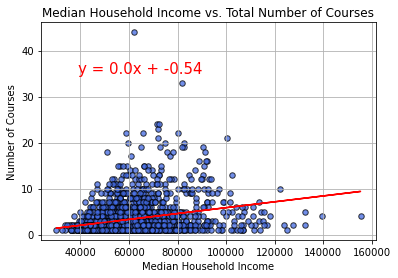

In [8]:
# Median Household Income vs. Number of Courses Analysis (USA)

plot_graph(discgolf_area_df["Median Household Income"],
           discgolf_area_df["Number of Courses"],
           "Median Household Income vs. Total Number of Courses",
           "Median Household Income",
           "Number of Courses")

plot_linreg(discgolf_area_df["Median Household Income"], discgolf_area_df["Number of Courses"])

The r-value is: 0.3354988210113527


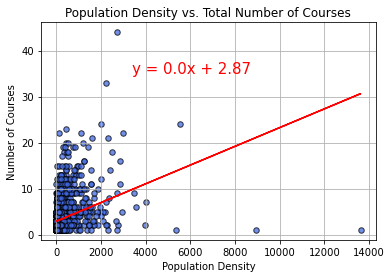

In [9]:
# Population Density vs. Number of Courses Analysis (USA)

plot_graph(discgolf_area_df["Population Density"],
           discgolf_area_df["Number of Courses"],
           "Population Density vs. Total Number of Courses",
           "Population Density",
           "Number of Courses")

plot_linreg(discgolf_area_df["Population Density"], discgolf_area_df["Number of Courses"])

The r-value is: 0.3464784543713047


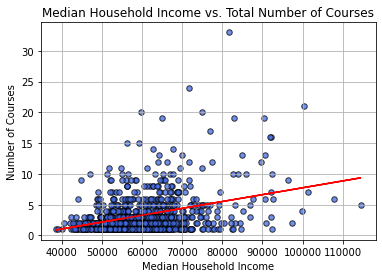

In [10]:
# Median Household Income vs. Number of Courses Analysis (MidWest)

plot_graph(discgolf_mw_area_df["Median Household Income"],
           discgolf_mw_area_df["Number of Courses"],
           "Median Household Income vs. Total Number of Courses",
           "Median Household Income",
           "Number of Courses")

plot_linreg(discgolf_mw_area_df["Median Household Income"], discgolf_mw_area_df["Number of Courses"])

The r-value is: 0.5905998917600768


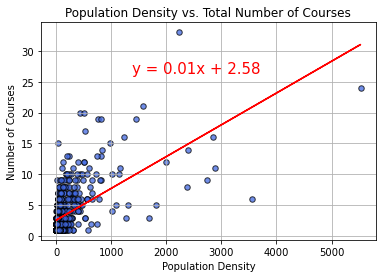

In [11]:
# Population Density vs. Number of Courses Analysis (MidWest)

plot_graph(discgolf_mw_area_df["Population Density"],
           discgolf_mw_area_df["Number of Courses"],
           "Population Density vs. Total Number of Courses",
           "Population Density",
           "Number of Courses")

plot_linreg(discgolf_mw_area_df["Population Density"], discgolf_mw_area_df["Number of Courses"])

In [12]:
formatted_us_df = discgolf_area_df

formatted_us_df.loc[:, "Average Income"] = formatted_us_df["Average Income"].map('{:,.0f}'.format)
formatted_us_df.loc[:, "Median Household Income"] = formatted_us_df["Median Household Income"].map('{:,.0f}'.format)
formatted_us_df["Average Income"] = "$" + formatted_us_df["Average Income"]
formatted_us_df["Median Household Income"] = "$" + formatted_us_df["Median Household Income"]

formatted_us_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Abbeville County, SC",southeast,SC,9.000,1.0,50.3,"$54,736","$47,219",1
1,"Acadia Parish, LA",southeast,LA,9.000,2.0,95.5,"$54,655","$45,183",1
2,"Ada County, ID",west,ID,12.571,2.4,423.8,"$101,398","$73,324",14
3,"Adair County, IA",midwest,IA,18.000,NaN,12.5,"$56,603","$55,265",3
4,"Adair County, MO",midwest,MO,9.000,NaN,44.6,"$50,321","$49,175",1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.737,3.5,380.0,"$64,754","$72,579",19
1968,"York County, VA",southeast,VA,18.000,4.0,645.0,"$93,260","$91,711",2
1969,"Young County, TX",southwest,TX,9.000,NaN,19.8,"$69,078","$54,569",2
1970,"Yuba County, CA",west,CA,21.600,4.0,119.5,"$77,158","$56,278",5


In [13]:
formatted_mw_df = discgolf_mw_area_df

formatted_mw_df.loc[:, "Average Income"] = formatted_mw_df["Average Income"].map('{:,.0f}'.format)
formatted_mw_df.loc[:, "Median Household Income"] = formatted_mw_df["Median Household Income"].map('{:,.0f}'.format)
formatted_mw_df["Average Income"] = "$" + formatted_mw_df["Average Income"]
formatted_mw_df["Median Household Income"] = "$" + formatted_mw_df["Median Household Income"]

formatted_mw_df

,"County Name, State",Region,State,Hole Count,Rating,Population Density,Average Income,Median Household Income,Number of Courses
0,"Adair County, IA",midwest,IA,18.0,NaN,12.514,"$56,603","$55,265",3
1,"Adair County, MO",midwest,MO,9.0,NaN,44.639,"$50,321","$49,175",1
2,"Adams County, IA",midwest,IA,18.0,NaN,8.799,"$55,374","$56,291",1
3,"Adams County, IL",midwest,IL,18.0,3.000000,77.674,"$66,968","$57,434",2
4,"Adams County, IN",midwest,IN,9.0,NaN,103.811,"$55,082","$58,602",1
...,...,...,...,...,...,...,...,...,...
768,"Wyandot County, OH",midwest,OH,18.0,3.000000,54.335,"$53,990","$63,516",1
769,"Wyandotte County, KS",midwest,KS,16.2,4.333333,1084.069,"$52,411","$52,223",5
770,"Yankton County, SD",midwest,SD,13.5,3.333333,43.589,"$62,936","$57,075",6
771,"Yellow Medicine County, MN",midwest,MN,9.0,NaN,13.000,"$55,556","$62,290",3


In [21]:
discgolf_region_df = pd.DataFrame(pd.read_csv('Resources/dgolf_summary_region.csv'))
discgolf_region_df

,region,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,midwest,12.780015,3.296844,376.286086,65420.247144,64082.951201,2582
1,northeast,14.813725,3.412969,535.186248,76407.328392,68872.204248,612
2,southeast,14.737484,3.451841,426.443617,63305.839864,59979.717587,1558
3,southwest,13.802419,3.337838,595.999901,68296.291555,62011.845430,744
4,west,13.806731,3.336538,327.448230,74208.384610,70818.755769,1040


In [ ]:
discgolf_region_df = pd.DataFrame(pd.read_csv('Resources/dgolf_summary_region.csv'))
discgolf_region_df

Text(0.5, 1.0, 'Pie Chart')

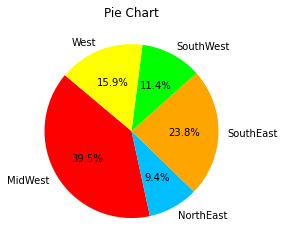

In [19]:
# Labels for the sections of our pie chart
labels = ["MidWest", "NorthEast", "SouthEast", "SouthWest", "West"]

# The values of each section of the pie chart
sizes = [2582, 612, 1558, 744, 1040]

# The colors of each section of the pie chart
colors = ["red", "deepskyblue", "orange", "lime", "yellow"]

# Tells matplotlib to seperate the "Humans" section from the others
# explode = (0, 0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Pie Chart")